# Project

In this project, we will use the Python libraries NumPy and Scikit-learn to implement a KMeans clustering algorithm.  The data simulated data will only have two clusters, which will be identified by the clustering algorithm.  

To get started, make sure you are using Python 2.7 by evaluating the following cell.

In [1]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


Import the necessary packages.  We will be using the following libraries and modules:

* numpy
* matplotlib
* sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 1. Generate the Data

For this project, we are going to generate our own data.  To do this, we will initialize two multivariate normal distributions with two separate means.  The two distributions will be our two clusters.  Furthermore, to better understand the data before applying our algorithm, we will visualize the combined distribution using a scatter plot.

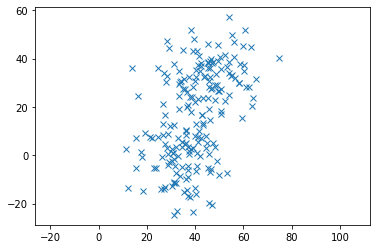

In [3]:
# Generate Data - two means
mean1 = [np.random.randint(50), np.random.randint(50)]
mean2 = [np.random.randint(50), np.random.randint(50)]

# Make diagonal covariance
cov = [[100,0], [0, 100]]

x1, y1 = np.random.multivariate_normal(mean1, cov, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov, 100).T

x = np.append(x1, x2)
y = np.append(y1, y2)

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

### 1.1 Format the data

The data needs to be a single NumPy array before being input into our KMeans algorithm.  To do that, evaluate the following cell.

In [4]:
X = np.array(list(zip(x, y)))

### 2. Make KMeans Model

Using the scikit-learn library makes implementing a KMeans clustering algorithm simple.  We initilize our model with two clusters, since we already known the data only has two clusters.  Next, we fit the model to the input data. 

In [5]:
# Make KMeans model
kmeans = KMeans(n_clusters = 2)

In [6]:
# Fit the model to the data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(labels)
print(centroids)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[[34.11927199 -1.58675072]
 [45.20725651 32.58872225]]


### 3. Visualize Data 

Now that we have fit our model to the data, lets visualize the results graphically.  To do this, we will iterate over the input data, assigning it a different color depending on its class label.  

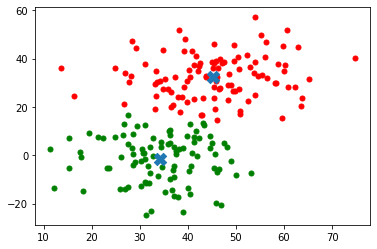

In [8]:
colors = ["g.", "r."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "X", s = 150, zorder = 10)

plt.show()

### 3.1 Compare Centroids to Expected Means

Since we generated the data, we know exactly where the centroids should be.  Use the following cell to compare the centroids to the actual means in order to gauge the perfomance of our model.  

In [9]:
print(centroids)
print(mean1, mean2)

[[34.11927199 -1.58675072]
 [45.20725651 32.58872225]]
[34, 1] [45, 33]
